In [1]:
#coding: utf-8
import os
import time
import random
import jieba
import sklearn
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from sklearn import metrics
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from numpy import vstack

def MakeWordsSet(words_file):
    """
    函数说明:读取文件里的内容，并去重
    Parameters:
        words_file - 文件路径
    Returns:
        words_set - 读取的内容的set集合
    """
    words_set = set()
    with open(words_file, 'r') as fp:
        for line in fp.readlines():
            word = line.strip()#.decode("utf-8")
            if len(word)>0 and word not in words_set: # 去重
                words_set.add(word)
    return words_set

def TextProcessing(folder_path, test_size=0.2):
########################################### 使用 #######################################################
# folder_path = './Database/SogouC/Sample'
    """
    函数说明:中文文本处理
    Parameters:
        folder_path - 文本存放的路径
        test_size - 测试集占比，默认占所有数据集的百分之20
    Returns:
        all_words_list - 按词频降序排序的训练集列表
        train_data_list - 训练集列表
        test_data_list - 测试集列表
        train_class_list - 训练集标签列表
        test_class_list - 测试集标签列表
    """
    folder_list = os.listdir(folder_path)
    data_list = []
    class_list = []
###################################################################################
# data_list  ： 全部文本信息list
# class_lsit ： 每个txt文件的类别标签
    # 类间循环
    for folder in folder_list:
        new_folder_path = os.path.join(folder_path, folder)
        files = os.listdir(new_folder_path)
        # 类内循环
        j = 1
        for file in files:
            if j > 100: # 每类text样本数最多100
                break
            with open(os.path.join(new_folder_path, file), 'r') as fp:
               raw = fp.read()
           
            word_cut = jieba.cut(raw, cut_all=False) # 精确模式，返回的结构是一个可迭代的genertor
            word_list = list(word_cut) # genertor转化为list，每个词unicode格式
          
            data_list.append(word_list)
            class_list.append(folder)#.decode('utf-8')
            j += 1

    # 划分训练集和测试集
    data_class_list = list(zip(data_list, class_list))
    random.shuffle(data_class_list)
    index = int(len(data_class_list)*test_size)#+1
    train_list = data_class_list[index:]
    test_list = data_class_list[:index]
    train_data_list, train_class_list = zip(*train_list)
    test_data_list, test_class_list = zip(*test_list)

    # 统计词频放入all_words_dict
    all_words_dict = {} 
    for word_list in train_data_list:
        for word in word_list:
            #if all_words_dict.has_key(word):
            if word in all_words_dict.keys():
                all_words_dict[word] += 1
            else:
                all_words_dict[word] = 1

    # 根据键的值倒序排序
    all_words_tuple_list = sorted(all_words_dict.items(), key=lambda f:f[1], reverse=True) # 内建函数sorted参数需为list
    #all_words_list = list(zip(*all_words_tuple_list))[0]
    all_words_list = list(zip(*all_words_tuple_list))[0]

    return all_words_list, train_data_list, test_data_list, train_class_list, test_class_list

def words_dict(all_words_list, deleteN, stopwords_set=set()):
    """
    函数说明:文本特征选取
    Parameters:
        all_words_list - 训练集所有文本列表
        deleteN - 删除词频最高的deleteN个词
        stopwords_set - 指定的结束语
    Returns:
        feature_words - 特征集
    """
    # 选取特征词
    feature_words = []
    n = 1
    for t in range(deleteN, len(all_words_list), 1):
        if n > 1000: # feature_words的维度1000
            break
        # 如果这个词不是数字，并且不是指定的结束语，并且单词长度大于1小于5，那么这个词就可以作为feature_word
        if not all_words_list[t].isdigit() and all_words_list[t] not in stopwords_set and 1<len(all_words_list[t])<5:
            feature_words.append(all_words_list[t])
            n += 1
    return feature_words

def TextFeatures(train_data_list, test_data_list, feature_words):
    """
    函数说明:根据feature_words将文本向量化
    Parameters:
        train_data_list - 训练集
        test_data_list - 测试集
        feature_words - 特征集
    Returns:
        train_feature_list - 训练集向量化列表
        test_feature_list - 测试集向量化列表
    """
    def text_features(text, feature_words):
        text_words = set(text)
        features = [1 if word in text_words else 0 for word in feature_words]
        return features
    train_feature_list = [text_features(text, feature_words) for text in train_data_list]
    test_feature_list = [text_features(text, feature_words) for text in test_data_list]
    return train_feature_list, test_feature_list

def TextClassifier(train_feature_list, test_feature_list, train_class_list, test_class_list):
    """
    函数说明:分类器
    Parameters:
        train_feature_list - 训练集向量化的特征文本
        test_feature_list - 测试集向量化的特征文本
        train_class_list - 训练集分类标签
        test_class_list - 测试集分类标签
    Returns:
        test_accuracy - 分类器精度
    """
    
    """
    
        请编写这部分代码

    """

    
    return test_accuracy

def Tuning():
    pass

if __name__ == '__main__':
    # 文本预处理
    folder_path = './Database/SogouC/Sample'
    all_words_list, train_data_list, test_data_list, train_class_list, test_class_list = TextProcessing(folder_path, test_size=0.2)

    # 生成stopwords_set
    stopwords_file = './stopwords_cn.txt'
    stopwords_set = MakeWordsSet(stopwords_file)

    # 文本特征提取和分类
    deleteN = 450
    feature_words = words_dict(all_words_list, deleteN, stopwords_set)
    train_feature_list, test_feature_list = TextFeatures(train_data_list, test_data_list, feature_words)
       


Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.636 seconds.
Prefix dict has been built succesfully.


In [2]:
train_feature_list = list(train_feature_list)
train_class_list = list(train_class_list)
test_feature_list = list(test_feature_list)
test_class_list = list(test_class_list)


params = {'alpha':np.linspace(0.001,1,100)}
classifier = MultinomialNB()

In [3]:
X_train = train_feature_list
Y_train  = train_class_list

X_val  = test_feature_list
Y_val = test_class_list


len_X_train = len(X_train)
len_X_val = len(X_val)
'''
X_train.append(X_val)
X = X_train
Y_train.extend(Y_val)
Y = Y_train'''
X = vstack([X_train,X_val])
X = np.array(X)
Y_train.extend(Y_val)
Y = np.array(Y_train)
    

#Mark the training-validation splits
train_i = np.ones((len_X_train,), dtype = int) * -1
valid_i = np.zeros((len_X_val,), dtype = int)
split_fold = np.concatenate((train_i, valid_i))
ps = PredefinedSplit(split_fold)
    
param_search = GridSearchCV(classifier,
                            params, 
                    scoring=metrics.make_scorer(metrics.f1_score, average='macro'),
                                cv=ps,
                                return_train_score=True)
param_search.fit(X,Y)
results = param_search.cv_results_
best_params = param_search.best_params_ 

/home/yangchonghuan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/yangchonghuan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/yangchonghuan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/yangchonghuan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/yangchonghuan/anacon

/home/yangchonghuan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/yangchonghuan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/yangchonghuan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/yangchonghuan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/yangchonghuan/anacon

In [4]:
clf = MultinomialNB(alpha = 0.006454545454545455)
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_val)
f1 = metrics.f1_score(Y_val, Y_pred, average='macro')


ValueError: Found input variables with inconsistent numbers of samples: [72, 90]

<function matplotlib.pyplot.show(*args, **kw)>

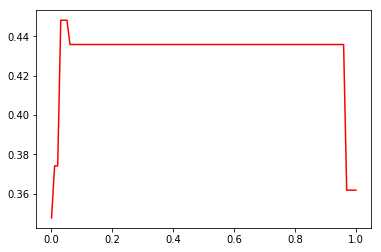

In [4]:
test_scores = results.get('split0_test_score')
par_ranges = params.values()

plt.plot(list(par_ranges)[0],test_scores,'r-')
plt.show

In [4]:
best_params

{'alpha': 0.006454545454545455}

In [5]:
results

{'mean_fit_time': array([0.44980407, 0.00243759, 0.00242901, 0.00242066, 0.00253463,
        0.00250244, 0.0027225 , 0.0027082 , 0.00292468, 0.00241351,
        0.00243044, 0.00170183, 0.0016408 , 0.00125837, 0.00137591,
        0.00105977, 0.00104427, 0.00103283, 0.00092673, 0.00089979,
        0.00092793, 0.00153971, 0.00105453, 0.00105381, 0.00101089,
        0.00090146, 0.00097847, 0.00115967, 0.00098228, 0.00101018,
        0.00100899, 0.00113106, 0.00103402, 0.00096703, 0.00088286,
        0.00088048, 0.00097299, 0.00124073, 0.00100064, 0.00097346,
        0.00114346, 0.00112081, 0.00108671, 0.00095606, 0.0008924 ,
        0.00084829, 0.00093341, 0.00115752, 0.00116372, 0.00102305,
        0.00126982, 0.00100803, 0.00117064, 0.0008831 , 0.00108719,
        0.00110507, 0.00103498, 0.00102234, 0.00096631, 0.00076723,
        0.00077558, 0.00076723, 0.00072956, 0.0007143 , 0.00072479,
        0.00071621, 0.00074863, 0.00074553, 0.00072646, 0.00071192,
        0.00072241, 0.00079346,

In [63]:
m=list(train_class_list)
c=list(test_class_list)
m.extend(c)
m

['C000016',
 'C000013',
 'C000008',
 'C000022',
 'C000013',
 'C000010',
 'C000010',
 'C000022',
 'C000020',
 'C000022',
 'C000024',
 'C000010',
 'C000023',
 'C000022',
 'C000024',
 'C000023',
 'C000014',
 'C000010',
 'C000014',
 'C000008',
 'C000024',
 'C000013',
 'C000008',
 'C000013',
 'C000016',
 'C000016',
 'C000013',
 'C000013',
 'C000024',
 'C000014',
 'C000008',
 'C000010',
 'C000024',
 'C000020',
 'C000020',
 'C000023',
 'C000024',
 'C000022',
 'C000016',
 'C000013',
 'C000016',
 'C000014',
 'C000023',
 'C000010',
 'C000014',
 'C000020',
 'C000014',
 'C000016',
 'C000024',
 'C000020',
 'C000008',
 'C000013',
 'C000023',
 'C000008',
 'C000024',
 'C000023',
 'C000014',
 'C000022',
 'C000014',
 'C000020',
 'C000016',
 'C000016',
 'C000013',
 'C000016',
 'C000022',
 'C000008',
 'C000020',
 'C000020',
 'C000010',
 'C000023',
 'C000023',
 'C000024',
 'C000008',
 'C000023',
 'C000022',
 'C000020',
 'C000022',
 'C000013',
 'C000014',
 'C000022',
 'C000010',
 'C000016',
 'C000008',
 'C0

In [67]:
Y

['C000016',
 'C000013',
 'C000008',
 'C000020',
 'C000013',
 'C000014',
 'C000008',
 'C000008',
 'C000014',
 'C000020',
 'C000024',
 'C000016',
 'C000016',
 'C000016',
 'C000020',
 'C000016',
 'C000013',
 'C000022',
 'C000014',
 'C000022',
 'C000010',
 'C000016',
 'C000014',
 'C000014',
 'C000008',
 'C000022',
 'C000020',
 'C000008',
 'C000016',
 'C000023',
 'C000016',
 'C000020',
 'C000008',
 'C000024',
 'C000020',
 'C000022',
 'C000022',
 'C000023',
 'C000020',
 'C000010',
 'C000024',
 'C000008',
 'C000022',
 'C000020',
 'C000014',
 'C000023',
 'C000010',
 'C000024',
 'C000022',
 'C000024',
 'C000020',
 'C000020',
 'C000014',
 'C000014',
 'C000024',
 'C000016',
 'C000023',
 'C000013',
 'C000010',
 'C000014',
 'C000023',
 'C000023',
 'C000010',
 'C000008',
 'C000010',
 'C000013',
 'C000024',
 'C000023',
 'C000023',
 'C000013',
 'C000013',
 'C000008',
 'C000023',
 'C000022',
 'C000010',
 'C000010',
 'C000013',
 'C000008',
 'C000010',
 'C000024',
 'C000023',
 'C000013',
 'C000014',
 'C0

In [57]:
len(Y_train)

170

In [6]:
X = np.vstack([train_feature_list,test_feature_list])
    #np.vstack((a,b))
    #Y_train.extend(Y_val)
    #Y = np.array(Y_train)
Y = np.append(train_class_list,test_class_list)
Y

array(['C000008', 'C000013', 'C000024', 'C000022', 'C000020', 'C000016',
       'C000016', 'C000013', 'C000024', 'C000023', 'C000023', 'C000023',
       'C000014', 'C000014', 'C000020', 'C000020', 'C000016', 'C000008',
       'C000010', 'C000014', 'C000016', 'C000022', 'C000010', 'C000014',
       'C000020', 'C000008', 'C000023', 'C000016', 'C000010', 'C000023',
       'C000020', 'C000013', 'C000023', 'C000016', 'C000023', 'C000010',
       'C000022', 'C000022', 'C000013', 'C000014', 'C000013', 'C000010',
       'C000024', 'C000022', 'C000020', 'C000022', 'C000014', 'C000020',
       'C000010', 'C000024', 'C000024', 'C000022', 'C000014', 'C000008',
       'C000024', 'C000014', 'C000010', 'C000024', 'C000008', 'C000020',
       'C000014', 'C000008', 'C000010', 'C000013', 'C000008', 'C000023',
       'C000024', 'C000022', 'C000010', 'C000020', 'C000023', 'C000008',
       'C000016', 'C000016', 'C000023', 'C000013', 'C000016', 'C000024',
       'C000008', 'C000010', 'C000024', 'C000022', 

In [7]:
c= np.ones((train_feature_list.shape[0],1000), dtype = int)*-1
d= np.zeros((test_feature_list.shape[0],1000), dtype = int)

split_fold = np.concatenate((c,d))
split_fold.shape

(90, 1000)

In [34]:
test_feature_list.shape

(19, 1000)

In [26]:
train_feature_list.shape

(71, 1000)

In [3]:
def tuning(X_train, Y_train, X_val, Y_val, classifier , params):
    '''
    Tunes hyperparameters by running the classifier trained using training data
    on the range of parameters given, and returns the parameters which give the
    best f1-score on test data
    '''
    #Combine training and validation into one set
    X = vstack([X_train,X_val])
    #np.vstack((a,b))
    #Y_train.extend(Y_val)
    #Y = np.array(Y_train)
    Y = np.append(Y_train,Y_val)
    
    #Mark the training-validation splits
    train_i = np.ones((X_train.shape[0],1000), dtype = int) * -1
    valid_i = np.zeros((X_val.shape[0],1), dtype = int)
    split_fold = np.concatenate((train_i, valid_i))
    ps = PredefinedSplit(split_fold)
    
    param_search = GridSearchCV(classifier, params, scoring=metrics.make_scorer(metrics.f1_score, average='macro'), cv=ps, return_train_score=True)
    param_search.fit(X,Y)
    results = param_search.cv_results_
    best_params = param_search.best_params_
    '''
    #Plotting
    test_scores = results.get('split0_test_score')
    par_ranges = params.values()
    plt.plot(par_ranges[0],test_scores,'r-')
    plt.show
    '''
    return best_params, results


['C000023',
 'C000013',
 'C000024',
 'C000022',
 'C000008',
 'C000020',
 'C000014',
 'C000016',
 'C000010']

In [7]:
#coding: utf-8
import os
import time
import random
import jieba
import sklearn
from sklearn.naive_bayes import MultinomialNB
import numpy as np

#######################################
#                tuning               #
from sklearn import metrics
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from scipy.sparse import vstack



def MakeWordsSet(words_file):
    """
    函数说明:读取文件里的内容，并去重
    Parameters:
        words_file - 文件路径
    Returns:
        words_set - 读取的内容的set集合
    """
    words_set = set()
    with open(words_file, 'r') as fp:
        for line in fp.readlines():
            word = line.strip()#.decode("utf-8")
            if len(word)>0 and word not in words_set: # 去重
                words_set.add(word)
    return words_set

def TextProcessing(folder_path, test_size=0.2):
    """
    函数说明:中文文本处理
    Parameters:
        folder_path - 文本存放的路径
        test_size - 测试集占比，默认占所有数据集的百分之20
    Returns:
        all_words_list - 按词频降序排序的训练集列表
        train_data_list - 训练集列表
        test_data_list - 测试集列表
        train_class_list - 训练集标签列表
        test_class_list - 测试集标签列表
    """
    folder_list = os.listdir(folder_path)
    data_list = []
    class_list = []

    # 类间循环
    for folder in folder_list:
        new_folder_path = os.path.join(folder_path, folder)
        files = os.listdir(new_folder_path)
        # 类内循环
        j = 1
        for file in files:
            if j > 100: # 每类text样本数最多100
                break
            with open(os.path.join(new_folder_path, file), 'r') as fp:
               raw = fp.read()
           
            word_cut = jieba.cut(raw, cut_all=False) # 精确模式，返回的结构是一个可迭代的genertor
            word_list = list(word_cut) # genertor转化为list，每个词unicode格式
          
            data_list.append(word_list)
            class_list.append(folder)#.decode('utf-8')
            j += 1

    # 划分训练集和测试集
    data_class_list = list(zip(data_list, class_list))
    random.shuffle(data_class_list)
    index = int(len(data_class_list)*test_size)+1
    train_list = data_class_list[index:]
    test_list = data_class_list[:index]
    train_data_list, train_class_list = zip(*train_list)
    test_data_list, test_class_list = zip(*test_list)

    # 统计词频放入all_words_dict
    all_words_dict = {} 
    for word_list in train_data_list:
        for word in word_list:
            #if all_words_dict.has_key(word):
            if word in all_words_dict.keys():
                all_words_dict[word] += 1
            else:
                all_words_dict[word] = 1

    # 根据键的值倒序排序
    all_words_tuple_list = sorted(all_words_dict.items(), key=lambda f:f[1], reverse=True) # 内建函数sorted参数需为list
    all_words_list = list(zip(all_words_tuple_list))[0]

    return all_words_list, train_data_list, test_data_list, train_class_list, test_class_list

def words_dict(all_words_list, deleteN, stopwords_set=set()):
    """
    函数说明:文本特征选取
    Parameters:
        all_words_list - 训练集所有文本列表
        deleteN - 删除词频最高的deleteN个词
        stopwords_set - 指定的结束语
    Returns:
        feature_words - 特征集
    """
    # 选取特征词
    feature_words = []
    n = 1
    for t in range(deleteN, len(all_words_list), 1):
        if n > 1000: # feature_words的维度1000
            break
        # 如果这个词不是数字，并且不是指定的结束语，并且单词长度大于1小于5，那么这个词就可以作为feature_word
        if not all_words_list[t].isdigit() and all_words_list[t] not in stopwords_set and 1<len(all_words_list[t])<5:
            feature_words.append(all_words_list[t])
            n += 1
    return feature_words

def TextFeatures(train_data_list, test_data_list, feature_words):
    """
    函数说明:根据feature_words将文本向量化
    Parameters:
        train_data_list - 训练集
        test_data_list - 测试集
        feature_words - 特征集
    Returns:
        train_feature_list - 训练集向量化列表
        test_feature_list - 测试集向量化列表
    """
    def text_features(text, feature_words):
        text_words = set(text)
        features = [1 if word in text_words else 0 for word in feature_words]
        return features
    train_feature_list = [text_features(text, feature_words) for text in train_data_list]
    test_feature_list = [text_features(text, feature_words) for text in test_data_list]
    return train_feature_list, test_feature_list

def TextClassifier(train_feature_list, test_feature_list, train_class_list, test_class_list):
    """
    函数说明:分类器
    Parameters:
        train_feature_list - 训练集向量化的特征文本
        test_feature_list - 测试集向量化的特征文本
        train_class_list - 训练集分类标签
        test_class_list - 测试集分类标签
    Returns:
        test_accuracy - 分类器精度
    """
    
    """
    
        请编写这部分代码

    """
    #pass
    
    #return test_accuracy
def tuning(X_train, Y_train, X_val, Y_val, classifier , params):
    '''
    Tunes hyperparameters by running the classifier trained using training data
    on the range of parameters given, and returns the parameters which give the
    best f1-score on test data
    '''
    #Combine training and validation into one set
    #X = vstack([X_train,X_val])
    
    #np.vstack((a,b))
    Y_train.extend(Y_val)
    #Y = np.array(Y_train)
    Y = np.append(Y_train,Y_val)
    #Mark the training-validation splits
    train_i = np.ones((X_train.shape[0],), dtype = int) * -1
    valid_i = np.zeros((X_val.shape[0],), dtype = int)
    #split_fold = np.concatenate((train_i, valid_i))
    #ps = PredefinedSplit(split_fold)
    
    param_search = GridSearchCV(classifier, params, 
                    scoring=metrics.make_scorer(metrics.f1_score, average='macro'),
                                cv=None,
                                return_train_score=True)
    param_search.fit(X,Y)
    results = param_search.cv_results_
    best_params = param_search.best_params_
    '''
    #Plotting
    test_scores = results.get('split0_test_score')
    par_ranges = params.values()
    plt.plot(par_ranges[0],test_scores,'r-')
    plt.show
    '''
    return best_params, results




if __name__ == '__main__':
    # 文本预处理
    folder_path = './Database/SogouC/Sample'
    all_words_list, train_data_list, test_data_list, train_class_list, test_class_list = TextProcessing(folder_path, test_size=0.2)

    # 生成stopwords_set
    stopwords_file = './stopwords_cn.txt'
    stopwords_set = MakeWordsSet(stopwords_file)

    # 文本特征提取和分类
    deleteN = 450
    feature_words = words_dict(all_words_list, deleteN, stopwords_set)
    train_feature_list, test_feature_list = TextFeatures(train_data_list, test_data_list, feature_words)

    # HyperParamater Tuning 
    params_NB = {'alpha':np.linspace(0.001,0.01,100)}
    
    train_feature_list = list(train_feature_list)
    train_class_list = list(train_class_list)
    test_feature_list = list(test_feature_list)
    test_class_list = list(test_class_list)
    '''
    train_feature_list = np.array(train_feature_list)
    train_class_list = np.array(train_class_list)
    test_feature_list = np.array(test_feature_list)
    test_class_list = np.array(test_class_list)
    '''
    best_alpha, results = tuning(train_feature_list,train_class_list,test_feature_list,test_class_list, MultinomialNB(), params_NB)
    #best_alpha, results = tuning(X_trainf, Y_trainf, X_valf, Y_valf, MultinomialNB(), params_NB)
    print(results)


ValueError: DataFrame constructor not properly called!

In [8]:
m = (1,2)

In [10]:
list(m)

[1, 2]

In [12]:
x = [[1,2],[1,2]]
y = [[3,2],[5,2]]
append(x,y)

NameError: name 'append' is not defined